# Text Summarization 
## A - Preprocessing 
### Synthèse extractive

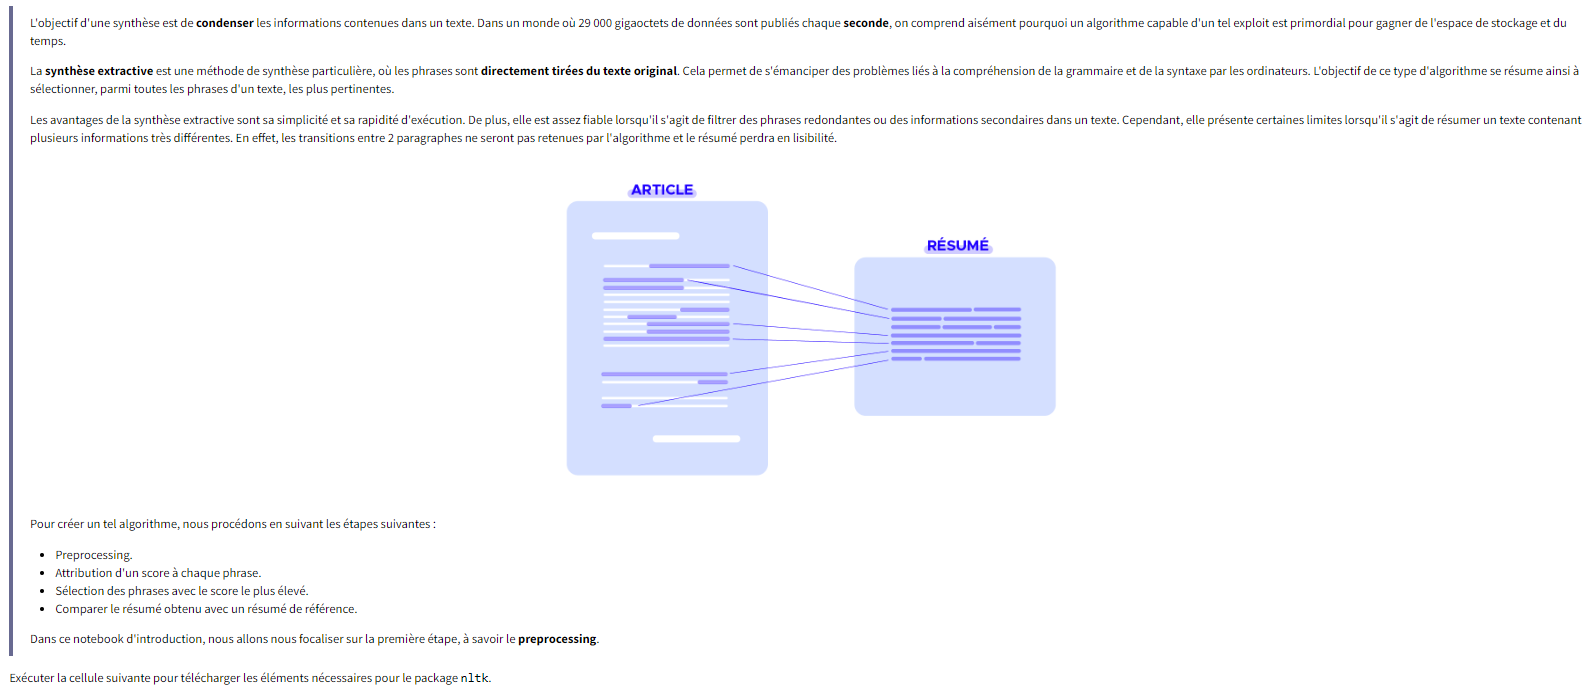

In [1]:
import nltk
nltk.download('punkt')

#La ligne suivante est à exécuter si les stopwords ne sont pas chargés
#nltk.download('stopwords') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Traitement des données textuelles
Lire le fichier "Article.csv" dans un Dataframe appelé df.
Afficher les 5 premières lignes de df.

In [ ]:
""" trouvé sur github le vrai dataset dans dossier perso data = BBC-Dataset-News-Classification-master
mais DS a fait un csv special avec les dossier de text...=> je ne peux lancer les cellules ainsi => ne pas lancer encore...
"""

In [ ]:
""" j'ai créé df = pd.read_csv('D:/data/csv/Article.csv', sep='\t') et il reste à y mettre les vrais texts dans la colonne Article plutot que 001.txt etc... 
reste aussi en rendre la colonne Number en integer et non float ! et virer la colonne d'index Unnamed """

In [ ]:
import pandas as pd
df = pd.read_csv('D:/data/csv/Article.csv')

df.head()

In [ ]:
"""  chez DS on a ceci
	Title	                           Article	                                           Summary	                                          Domain	  Number = index+1
0	Ad sales boost Time Warner profit	Quarterly profits at US media giant TimeWarner...	TimeWarner said fourth quarter sales rose 2% t...	business	1
1	Dollar gains on Greenspan speech	The dollar has hit its highest level against t...	The dollar has hit its highest level against t...	business	2
2	Yukos unit buyer faces loan claim	The owners of embattled Russian oil giant Yuko...	Yukos' owner Menatep Group says it will ask Ro...	business	3
3	High fuel prices hit BA's profits	British Airways has blamed high fuel prices fo...	Rod Eddington, BA's chief executive, said the ...	business	4
4	Pernod takeover talk lifts Domecq	Shares in UK drinks and food firm Allied Domec...	Pernod has reduced the debt it took on to fund...	business	5

"""

Ce dataset contient 2224 articles de la BBC et un résumé pour chacun d'eux. Les résumés ont été faits à la main, en sélectionnant uniquement les phrases les plus importantes de l'article. Nous utiliserons ces résumés comme variable cible pour nos données.

Les articles ont été classés en 5 catégories :

business
entertainement
politics
sport
tech
Dans un graphique, afficher le nombre d'articles de chaque catégorie.

<AxesSubplot:xlabel='Domain', ylabel='count'>

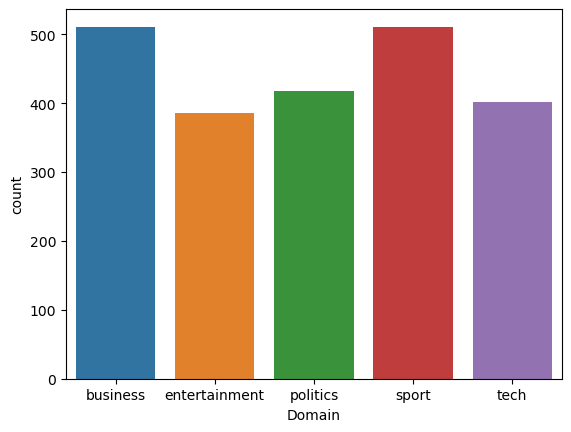

In [26]:
import seaborn as sns
sns.countplot(data=df, x='Domain')

Afficher désormais un des articles du dataset.

In [28]:
df.loc[0]['Article'] #  => pb principal ici

'001.txt'

In [34]:
"""
'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the 
biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.
Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google.
But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, 
the company said AOL\'s underlying profit before exceptional items rose 8%
"""


"\n'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the \nbiggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.\nIts profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google.\nBut its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, \nthe company said AOL's underlying profit before exceptional items rose 8%\n"

On peut voir que l'article s'affiche d'un seul bloc.

Nous souhaitons délimiter chaque phrase puis chaque mot de l'article. Pour cela, nous utiliserons les fonctions sent_tokenize et word_tokenize de la librairie nltk.

Afficher le résultat de ces deux fonctions sur l'exemple ci-dessous. Vous pouvez afficher la documentation de ces fonctions à l'aide de la fonction help.

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

exemple = "Hello world. This is a test... It doesn't mean anything.\nLet's try to use a number 3.6. And some special characters : @!^&."

print(sent_tokenize(exemple))
print(word_tokenize(exemple))

In [33]:
"""

['Hello world.', 'This is a test...', "It doesn't mean anything.", "Let's try to use a number 3.6.", 'And some special characters : @!^&.']
['Hello', 'world', '.', 'This', 'is', 'a', 'test', '...', 'It', 'does', "n't", 'mean', 'anything', '.', 'Let', "'s", 'try', 'to', 'use', 'a', 'number', '3.6', '.', 'And', 'some', 'special', 'characters', ':', '@', '!', '^', '&', '.']
"""

'\n\n[\'Hello world.\', \'This is a test...\', "It doesn\'t mean anything.", "Let\'s try to use a number 3.6.", \'And some special characters : @!^&.\']\n[\'Hello\', \'world\', \'.\', \'This\', \'is\', \'a\', \'test\', \'...\', \'It\', \'does\', "n\'t", \'mean\', \'anything\', \'.\', \'Let\', "\'s", \'try\', \'to\', \'use\', \'a\', \'number\', \'3.6\', \'.\', \'And\', \'some\', \'special\', \'characters\', \':\', \'@\', \'!\', \'^\', \'&\', \'.\']\n'

Ces fonctions renvoient une liste de phrases et de mots. On notera que les caractères spéciaux et les chiffres sont considérés comme des mots, et sont donc conservés.

La fonction sub du package re est similaire à la fonction replace de pandas pour les DataFrames mais pour les chaînes de caractères. Les caractères spéciaux étant inutiles pour la plupart, nous allons pouvoir utiliser re.sub pour remplacer les caractères spéciaux des articles par des espaces.

Remarque : La prise en compte de la ponctuation dépend du type de texte que nous souhaitons traiter. Dans un tweet par exemple, on considère que la ponctuation contient autant (voire plus) de sens que les mots. Un tweet avec des points d'exclamation n'aura pas le même sens qu'un tweet avec des points de suspension ou d'interrogation par exemple. Dans ce cas, nous aurions été obligés de trouver une méthode pour les traiter correctement.   

Lancer la cellule suivante pour remplacer tous les caractères spéciaux et les chiffres de la phrase exemple par des espaces. En déduire le fonctionnement de la fonction re.sub.

In [ ]:
import re
liste_caracteres_speciaux="[^a-zA-Z]"

re.sub(pattern = liste_caracteres_speciaux, # La liste des caractères à remplacer au format regex
       repl = ' ',                          # ce par quoi remplacer ces caractères
       string = exemple)                    # la phrase dans laquelle il effectue le changement

In [32]:
"""
'Hello world  This is a test    It doesn t mean anything  Let s try to use a number      And some special characters        '
"""

"\n'Hello world  This is a test    It doesn t mean anything  Let s try to use a number      And some special characters        '\n"

A présent, on s'aperçoit que la majorité des mots contenus dans ces phrases sont vides de sens, c'est-à-dire qu'ils sont tellement communs qu'ils n'apportent pas d'information significative ("is", "the", "a", "to", ...)

Pour simplifier le travail de nos algorithmes ensuite, nous allons filtrer les mots pour ne conserver que les plus utiles.

Importer la fonction stopwords de nltk.corpus.
Afficher le résultat de l'instruction stopwords.words('english').

In [ ]:
from nltk.corpus import stopwords

print(stopwords.words('english'))


In [31]:
"""
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
"""

'\n[\'i\', \'me\', \'my\', \'myself\', \'we\', \'our\', \'ours\', \'ourselves\', \'you\', "you\'re", "you\'ve", "you\'ll", "you\'d", \'your\', \'yours\', \'yourself\', \'yourselves\', \'he\', \'him\', \'his\', \'himself\', \'she\', "she\'s", \'her\', \'hers\', \'herself\', \'it\', "it\'s", \'its\', \'itself\', \'they\', \'them\', \'their\', \'theirs\', \'themselves\', \'what\', \'which\', \'who\', \'whom\', \'this\', \'that\', "that\'ll", \'these\', \'those\', \'am\', \'is\', \'are\', \'was\', \'were\', \'be\', \'been\', \'being\', \'have\', \'has\', \'had\', \'having\', \'do\', \'does\', \'did\', \'doing\', \'a\', \'an\', \'the\', \'and\', \'but\', \'if\', \'or\', \'because\', \'as\', \'until\', \'while\', \'of\', \'at\', \'by\', \'for\', \'with\', \'about\', \'against\', \'between\', \'into\', \'through\', \'during\', \'before\', \'after\', \'above\', \'below\', \'to\', \'from\', \'up\', \'down\', \'in\', \'out\', \'on\', \'off\', \'over\', \'under\', \'again\', \'further\', \'then\'

Il s'agit d'une liste de mots anglais que l'on pourrait qualifier de vides de sens. A noter que cette liste n'est pas exhaustive, et que le choix des mots à y intégrer est souvent subjectif.

Définir une fonction clean_sentence qui prend en argument une liste de mots, et renvoie cette même liste sans stopword (mot vide). Pour cela il faudra

Parcourir chaque mot de la liste en commençant par le dernier. La fonction reversed permet de parcourir un range ou un enumerate à l'envers.
Si le mot est un stopword, l'enlever de la liste de mots. On pensera à utiliser la méthode pop pour les listes.
Appliquer la fonction clean_sentence sur la liste de mots suivantes : ['it', 'doesn', 't', 'mean', 'anything'], il ne devrait rester que 2 mots.

In [ ]:
def clean_sentence(sentence):
    SW = stopwords.words('english')
    
    # Pour chaque mot de la phrase (dans l'ordre inverse)
    for i, word in reversed(list(enumerate(sentence))):
            # Si le mot est un stopword
            if word in SW :
                # On l'enlève de l'artikle
                sentence.pop(i)
    return sentence

clean_sentence(['it', 'doesn', 't', 'mean', 'anything'])

# -> ['mean', 'anything']

Pour chaque article, nous souhaitons avoir un dictionnaire dont chaque clé représente le numéro d'une phrase, et dont les valeurs sont la liste des mots de la phrase. De plus, nous souhaitons que les caractères spéciaux, les nombres et les stopwords soient exclus de ce dictionnaire. Enfin, il nous sera utile d'avoir des mots uniquement en minuscule (en retirant par exemple les majuscules en début de phrase).

Pour la phrase d'exemple, le résultat que nous attendons est donc le suivant :

{0: ['hello', 'world'],
 1: ['test'],
 2: ['mean', 'anything'],
 3: ['let', 'try', 'use', 'number'],
 4: ['special', 'characters']}
En utilisant les fonctions sent_tokenize, re.sub, word_tokenize, clean_sentence et la méthode .lower(), créer une fonction dictionarize, qui transforme un article en un dictionnaire selon le procédé décrit plus haut. Les 4 étapes à suivre sont les suivantes (l'ordre a son importance) :
Découper l'article en une liste de phrases.
Parcourir chaque phrase de l'article.
Remplacer les caractères spéciaux par des espaces.
Découper chaque phrase en une liste de mots.
Mettre tous les mots en minuscule.
Retirer les stopwords.

In [ ]:
def dictionarize(article):
    dico ={}
    
    ## Etape 1:  Découper l'article en une liste de phrase
    article = sent_tokenize(article)
    
    for i, sent in enumerate(article) :
        
        ## Etape 2: Remplacer les caractères spéciaux par des espaces
        sent = re.sub(liste_caracteres_speciaux, ' ', sent)
        
        ## Etape 3: Découper chaque phrase en une liste de mots
        sent = word_tokenize(sent)
                
        ## Etape 4: Mettre tous les mots de la phrase en minuscule
        sent_lower = [word.lower() for word in sent]
        
        ## Etape 5: Retirer les stopwords de chaque liste.
        sent_clean = clean_sentence(sent_lower)
        
        dico[i]=sent_clean
    return dico

artikle = dictionarize(exemple)

artikle


In [35]:
"""
{0: ['hello', 'world'],
 1: ['test'],
 2: ['mean', 'anything'],
 3: ['let', 'try', 'use', 'number'],
 4: ['special', 'characters']}
 """

"\n{0: ['hello', 'world'],\n 1: ['test'],\n 2: ['mean', 'anything'],\n 3: ['let', 'try', 'use', 'number'],\n 4: ['special', 'characters']}\n "

Nous conserverons cette structure de dictionnaire pour chaque article tout au long du module. Pour simplifier, nous appellerons un élément ayant cette structure un artikle. Nous en avons désormais terminé avec le preprocessing. Voici ce qu'il faut retenir de ce notebook :

Pour commencer, nous avons choisi une structure particulière pour représenter nos données (un dictionnaire contenant des listes de mots). Cette dernière n'est pas unique, et nous aurions très bien pu en choisir une autre.
Ensuite, nous nous sommes intéressés au contenu de notre dataset. Nous avons opté pour la suppression des stopwords et des caractères spéciaux. Une fois de plus, cette décision est basée à la fois sur un a priori (le fait que certains mots et certains caractères ne sont pas porteurs d'information dans une phrase) et pour faciliter le traitement des données (moins de mots donc traitement plus rapide).
A présent, nous allons pouvoir transformer l'intégralité de nos articles en artikle avant de commencer le processing.

A l'aide des fonctions définies précédemment, stocker dans une liste l'intégralité des articles du DataFrame, sous forme d'artikles.

In [ ]:
def article_to_artikle(article):
    artikle = dictionarize(article)
    return artikle

df['Artikle'] = df['Article'].apply(lambda x : article_to_artikle(x))

df.head()


In [ ]:
"""

    Title	                            Article	                                          Summary	                                          Domain	Number	Artikle
0	Ad sales boost Time Warner profit	Quarterly profits at US media giant TimeWarner...	TimeWarner said fourth quarter sales rose 2% t...	business	1	{0: ['quarterly', 'profits', 'us', 'media', 'g...
1	Dollar gains on Greenspan speech	The dollar has hit its highest level against t...	The dollar has hit its highest level against t...	business	2	{0: ['dollar', 'hit', 'highest', 'level', 'eur...
2	Yukos unit buyer faces loan claim	The owners of embattled Russian oil giant Yuko...	Yukos' owner Menatep Group says it will ask Ro...	business	3	{0: ['owners', 'embattled', 'russian', 'oil', ...
3	High fuel prices hit BA's profits	British Airways has blamed high fuel prices fo...	Rod Eddington, BA's chief executive, said the ...	business	4	{0: ['british', 'airways', 'blamed', 'high', '...
4	Pernod takeover talk lifts Domecq	Shares in UK drinks and food firm Allied Domec...	Pernod has reduced the debt it took on to fund...	business	5	{0: ['shares', 'uk', 'drinks', 'food', 'firm',...
"""

Nous allons pouvoir passer à la deuxième étape de la synthèse extractive à savoir l'attribution d'un score à chaque phrase. Dans le prochain notebook, nous verrons une méthode particulière de scoring appelée TF-IDF.

## B - TF - IDF

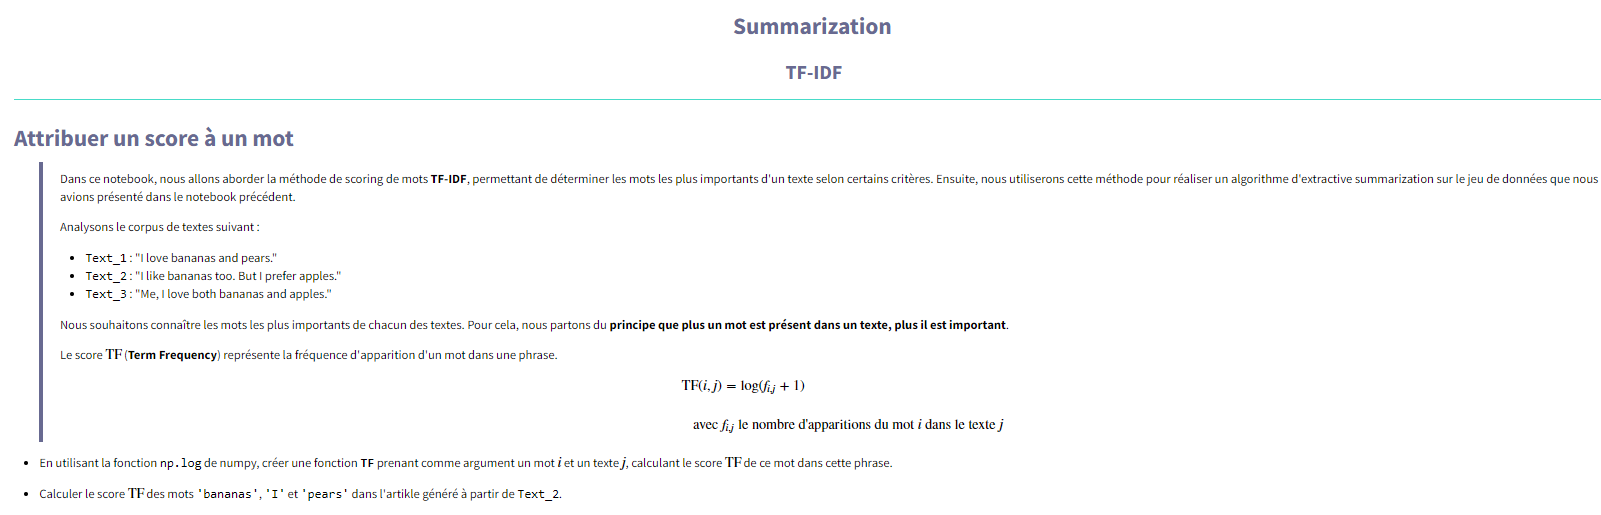

In [ ]:
import numpy as np

artikle = {0 : ["I", "like", "bananas", "too"], 
           1 : ["But", "I", "prefer", "apples"]}

def TF(token, artikle):
    """
    Calcule le score TF d'un mot dans un artikle
    
    token : Mot dont le score TF doit être calculé.
    
    artikle : Dictionnaire généré à partir d'un texte.
    """
    
    f = 0
    # Pour chaque phrase dans l'artikle
    for key in artikle:
        # Pour chaque mot dans la phrase
        for word in artikle[key]:
            if word == token:
                f += 1 
    return np.log(f+1)


print("TF('bananas', Text_2) = log(1 + 1) =", round(TF('bananas', artikle), 3))
print("TF('I', Text_2) = log(2 + 1) = ", round(TF('I', artikle), 3))
print("TF('pears', Text_2) = log(0 + 1) =", round(TF('pears', artikle), 3))

In [ ]:
"""
TF('bananas', Text_2) = log(1 + 1) = 0.693
TF('I', Text_2) = log(2 + 1) =  1.099
TF('pears', Text_2) = log(0 + 1) = 0.0
"""

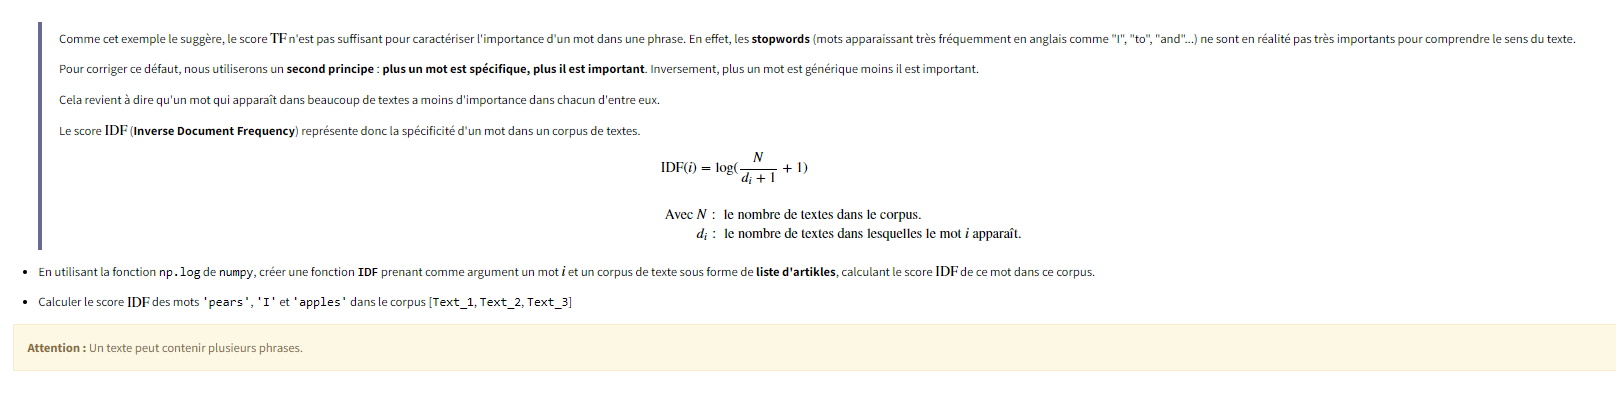

In [ ]:
Text_1 = {0:["I", "love", "bananas", "and", "pears"]}
Text_2 = {0:["I", "like", "bananas", "too"], 1:["But", "I", "prefer", "apples"]}
Text_3 = {0:["Me", "I", "love", "both", "bananas", "and", "apples"]}

Corpus = [Text_1, Text_2, Text_3]

def IDF(token, corpus):
    """
    Calcule le score IDF d'un mot dans un corpus d'artikles.
    
    token : Mot dont le score IDF doit être calculé.
    
    corpus : Liste d'artikles.
    """
    N = len(corpus)
    d = 0
    present = False
    
    for artikle in corpus:
        for key in artikle:
            if token in artikle[key]:
                present = True
        d += int(present)
        present = False
    print(d)
    return np.log(N/(d+1) +1)


print("IDF('pears', Corpus) = log(3/2 + 1) =", round(IDF('pears', Corpus), 3))
print("IDF('I', Corpus) = log(3/4 + 1) = ", round(IDF('I', Corpus), 3))
print("IDF('apples', Corpus) = log(3/3 + 1) =", round(IDF('apples', Corpus), 3))

In [ ]:
"""
1
IDF('pears', Corpus) = log(3/2 + 1) = 0.916
3
IDF('I', Corpus) = log(3/4 + 1) =  0.56
2
IDF('apples', Corpus) = log(3/3 + 1) = 0.693
"""

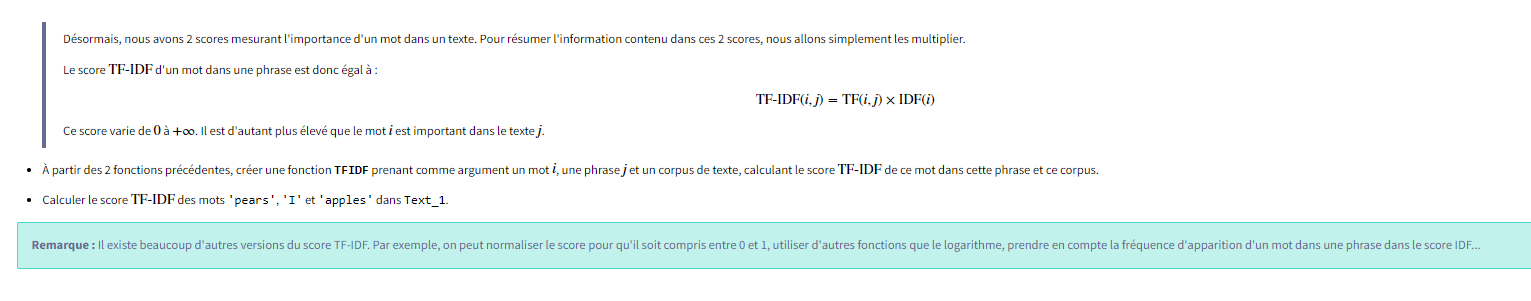

In [ ]:
def TFIDF(token, artikle, corpus):
    """
    Calcule le score TF-IDF d'un mot dans un texte.
    
    token : mot dont le score doit être calculé.
    
    artikle : artikle qui servira à calculer le score du mot dans cet artikle.
    
    corpus : Liste d'artikles formant le corpus.
    """
    return TF(token, artikle)*IDF(token, corpus)

print("TF-IDF('pears', Text_1, Corpus) =", round(TFIDF('pears', Text_1, Corpus), 3))
print("TF-IDF('I', Text_1, Corpus) =", round(TFIDF('I', Text_1, Corpus), 3))
print("TF-IDF('apples', Text_1, Corpus) =", round(TFIDF('apples', Text_1, Corpus), 3))

In [ ]:
"""
1
TF-IDF('pears', Text_1, Corpus) = 0.635
3
TF-IDF('I', Text_1, Corpus) = 0.388
2
TF-IDF('apples', Text_1, Corpus) = 0.0
"""

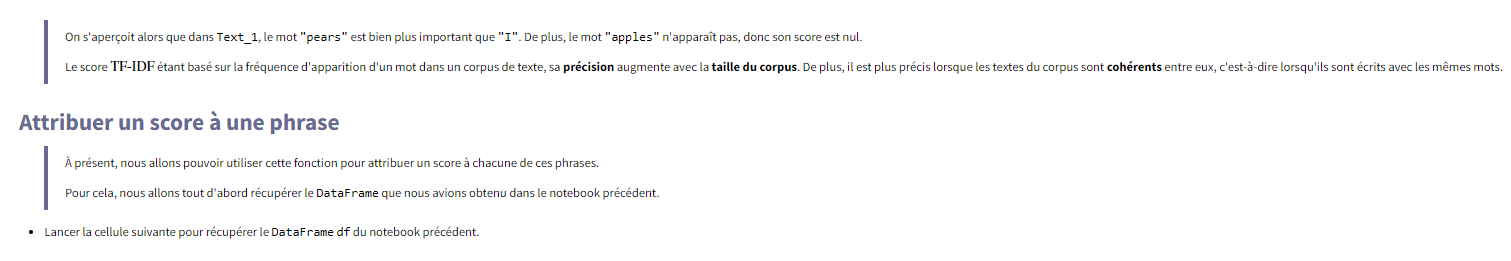

In [ ]:
import pandas as pd

df = pd.read_json('Artikle.json')

for i in range(len(df)):
    keys = list(df['Artikle'][i].keys())
    for key in keys:
        df['Artikle'][i][int(key)] = df['Artikle'][i].pop(key)

df.head()

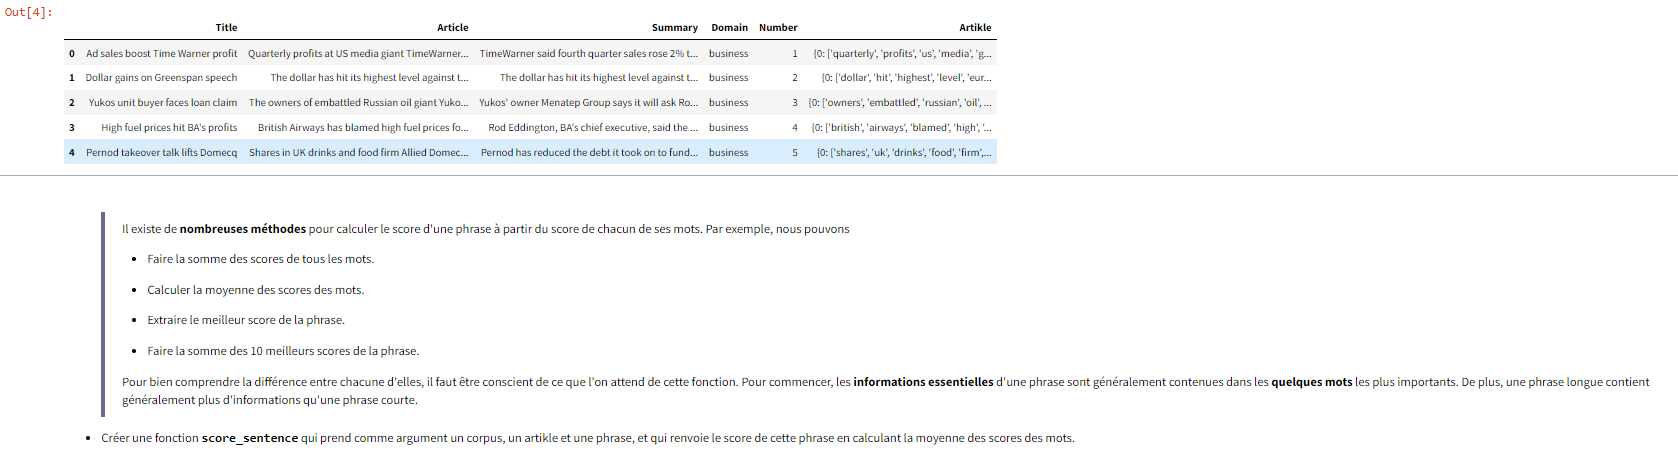

In [ ]:
### Cette fonction calcule la moyenne des scores des mots

def score_sentence(corpus, artikle, sentence):
    """
    Calcule le score d'une phrase.
    
    corpus : Liste d'artikles.
    
    artikle : Dictionnaire de phrases.
    
    sentence : Phrase sous forme de liste de mots.
    """
    score_sentence = []
    for word in sentence :
        score_word = TFIDF(word, artikle, corpus)
        score_sentence.append(score_word)
    return np.mean(score_sentence)


score_sentence(Corpus, Text_2, ["I", "like", "bananas", "too"])

In [ ]:
"""
3
1
3
1
0.5682363904765929
"""

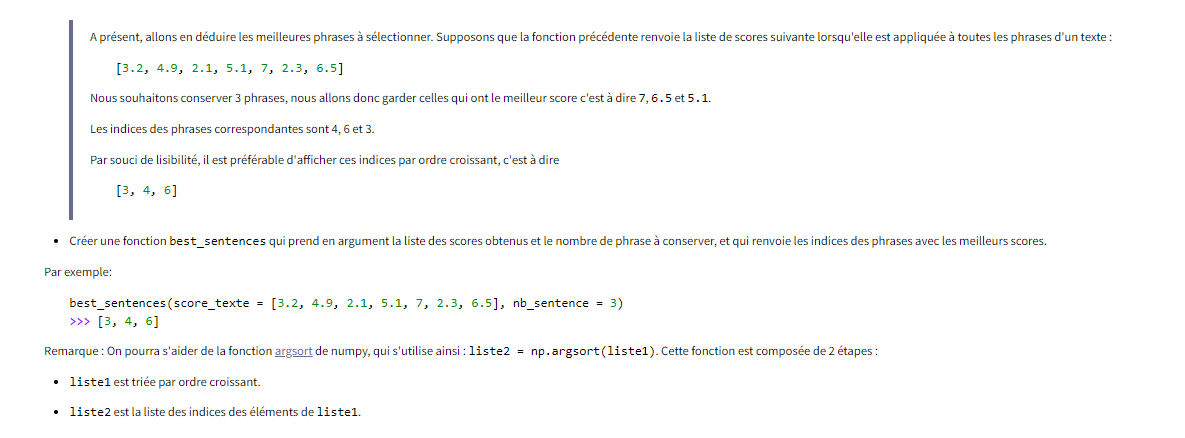

In [ ]:
def best_sentences(scores_artikle, nb_sentences):
    """
    Retourne les indices des phrases les plus importantes en fonction des scores obtenus.
    
    scores_artikle : Liste des scores de chaque phrase dans un texte.
    
    nb_sentences : Nombre de phrases à sélectionner.
    """
    
    return sorted(np.argsort(scores_artikle)[-nb_sentences:])

scores = [3.2, 4.9, 2.1, 5.1, 7, 2.3, 6.5]
nb_sentences = 3

best_sentences(scores, nb_sentences)

In [ ]:
# -> [3, 4, 6]

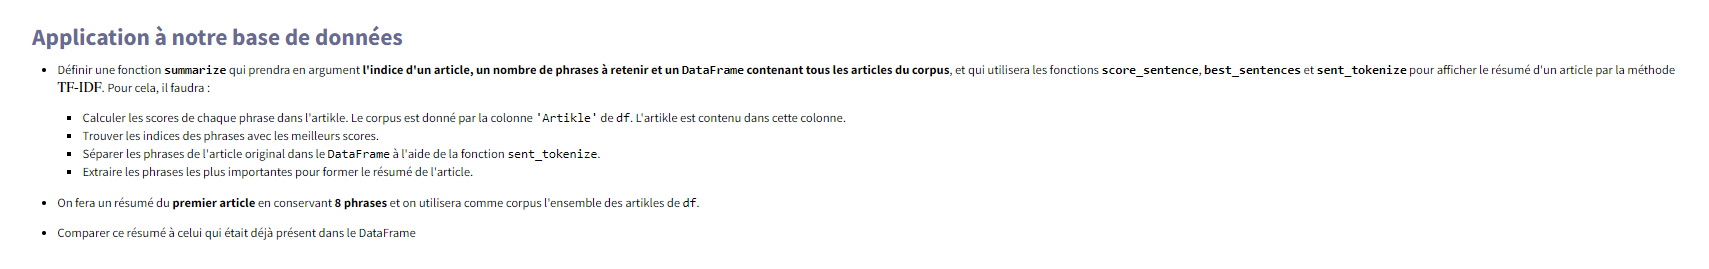

In [ ]:
from nltk import sent_tokenize


def summarize(i, n_sentences, df):
    """
    Synthèse extractive d'un article par la méthode TF-IDF.
    
    i : indice de l'article dans le corpus.
    
    n_sentences : nombre de phrases à conserver.
    
    df : DataFrame contenant les artikles dans une colonne 'Artikle' et les articles dans une colonne 'Article'.
    """ 
    corpus = df['Artikle']
    artikle = corpus[i]
    
    # Calcul du score de chaque phrase de l'artikle
    scores_artikle = [score_sentence(corpus, artikle, sentence) for sentence in artikle.values()]
    
    # Extraction des indices des phrases ayant les meilleurs scores
    result = best_sentences(scores_artikle, n_sentences)
    
    # Séparation de phrases l'article original 
    tokenized_article = sent_tokenize(df['Article'][i])
    
    # Extraction des phrases les plus importantes
    summary = [tokenized_article[i] for i in result]

    return summary

summary = summarize(0, 8, df)
real_summary = df['Summary'][0]


print(*summary)
print("\n\n")
print(real_summary)

In [37]:
"""
20
81
838
188
137
1
31
329
602
360
218
1187
263
356...............
51
15
251
73
119
51
TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. But its own internet business, AOL, had has mixed fortunes. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.



TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. Time Warner's fourth quarter profits were slightly better than analysts' expectations.
"""

"\n20\n81\n838\n188\n137\n1\n31\n329\n602\n360\n218\n1187\n263\n356...............\n51\n15\n251\n73\n119\n51\nTimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. But its own internet business, AOL, had has mixed fortunes. TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission (SEC), which is close to concluding. For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn. For 2005, TimeWarner is projecting operating earnings growth of around 5%, and also expects higher revenue and wider profit margins. TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators. It will now book the sale of its stake in AOL Europe as a loss on the value of that stake.\n\n\n\nTimeWarner said fourth quarter

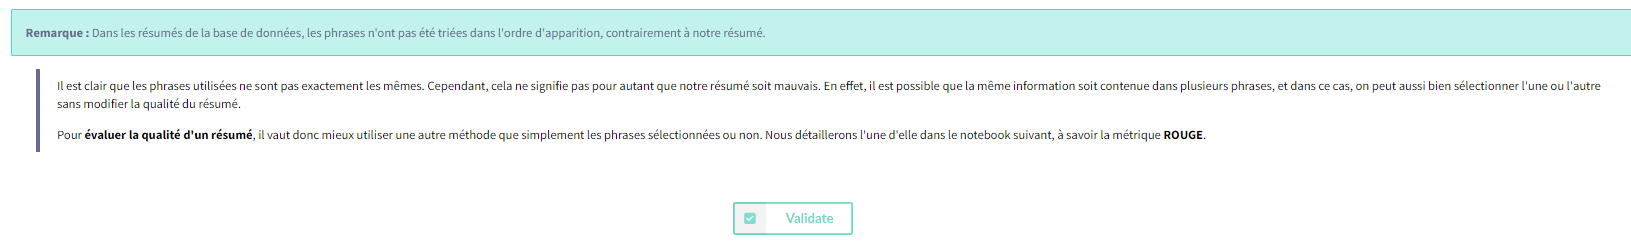

## C - ROUGE

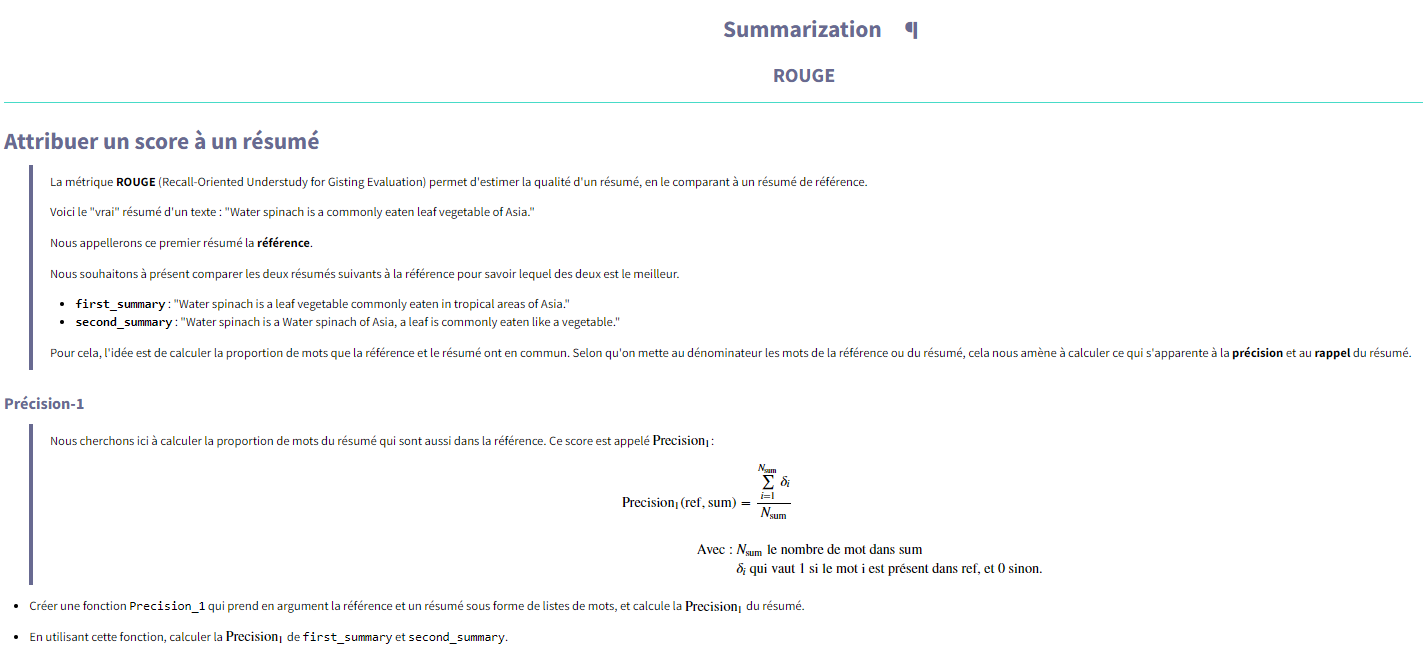

In [38]:
reference = ["Water", "spinach", "is", "a", "commonly",
             "eaten", "leaf", "vegetable", "of", "Asia"]

first_summary = ["Water", "spinach", "is", "a", "leaf", "vegetable",
                 "commonly", "eaten", "in", "tropical", "areas",
                 "of", "Asia"]

second_summary = ["Water", "spinach", "is", "a", "Water", "spinach",
                  "of", "Asia", "a", "leaf", "is", "commonly",
                  "eaten", "like", "a", "vegetable"]

def Precision_1(ref, summary):
    """
    Calcule le score Precision_1 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    N = len(summary)
    d = 0
    for word in summary:
        if word in ref:
            d+=1
    return d/N

print('Precision_1(reference, first_summary) = 10/13 =', Precision_1(reference, first_summary))
print('Precision_1(reference, second_summary) = 15/16 =', Precision_1(reference, second_summary))

Precision_1(reference, first_summary) = 10/13 = 0.7692307692307693
Precision_1(reference, second_summary) = 15/16 = 0.9375


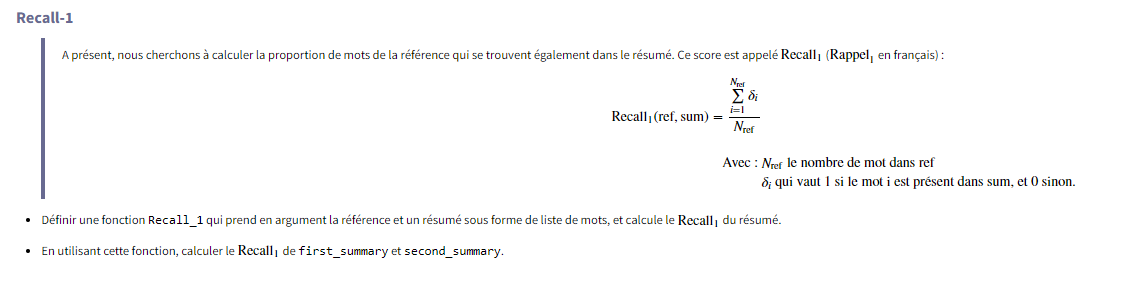

In [39]:
def Recall_1(ref, summary):
    """
    Calcule le score Recall_1 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    N = len(ref)
    d = 0
    for word in ref :
        if word in summary:
            d+=1
    return d/N

print('Recall-1(reference, first_summary) = 10/10 =', Recall_1(reference, first_summary))
print('Recall-1(reference, second_summary) = 10/10 =', Recall_1(reference, second_summary))

Recall-1(reference, first_summary) = 10/10 = 1.0
Recall-1(reference, second_summary) = 10/10 = 1.0


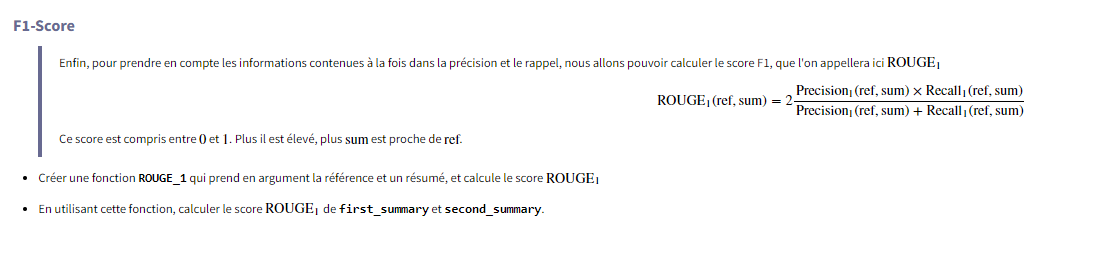

In [40]:
def ROUGE_1(ref, summary):
    """
    Calcule le score Rouge_1 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    if Precision_1(ref, summary)+Recall_1(ref, summary) == 0 :
        print(0)
    else:
        return 2*Precision_1(ref, summary)*Recall_1(ref, summary)/(Precision_1(ref, summary)+Recall_1(ref, summary))

print('ROUGE-1(reference, first_summary) =', ROUGE_1(reference, first_summary))
print('ROUGE-1(reference, second_summary) =', ROUGE_1(reference, second_summary))

ROUGE-1(reference, first_summary) = 0.8695652173913044
ROUGE-1(reference, second_summary) = 0.967741935483871


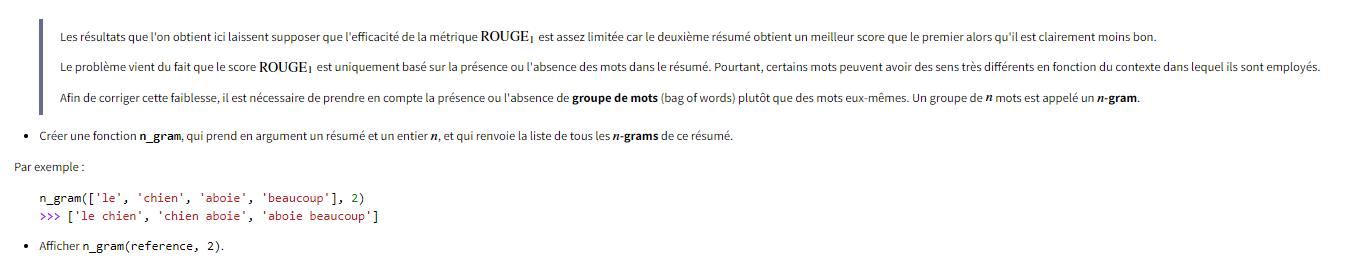

In [41]:
def n_gram(resume, n):
    """
    Transforme une liste de mots en une liste de n-grams.
    
    resume : Liste de mots.
    
    n : nombre de mots dans un groupe de mots.
    """
    result = []
    for i in range(len(resume) + 1 - n):
        n_gram = resume[i]
        for j in range(i+1, n+i):
            n_gram += ' ' + resume[j]
        result.append(n_gram)
    return result

n_gram(reference, 2)

['Water spinach',
 'spinach is',
 'is a',
 'a commonly',
 'commonly eaten',
 'eaten leaf',
 'leaf vegetable',
 'vegetable of',
 'of Asia']

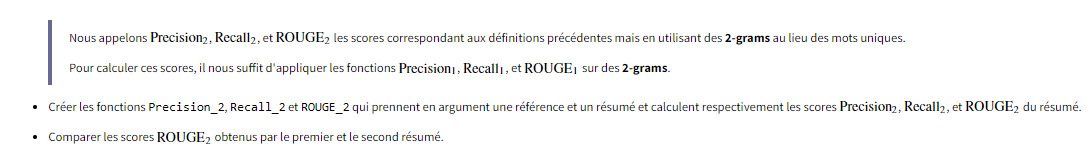

In [42]:
def Precision_2(ref, summary):
    """
    Calcule le score Precision_2 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    return Precision_1(n_gram(ref, 2), n_gram(summary, 2))

def Recall_2(ref, summary):
    """
    Calcule le score Recall_2 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    return Recall_1(n_gram(ref, 2), n_gram(summary, 2))

def ROUGE_2(ref, summary):
    """
    Calcule le score Rouge_2 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    return ROUGE_1(n_gram(ref, 2), n_gram(summary, 2))

print('ROUGE_2(reference, first_summary) =', ROUGE_2(reference, first_summary))
print('ROUGE_2(reference, second_summary) =', ROUGE_2(reference, second_summary))

ROUGE_2(reference, first_summary) = 0.5714285714285715
ROUGE_2(reference, second_summary) = 0.46511627906976744


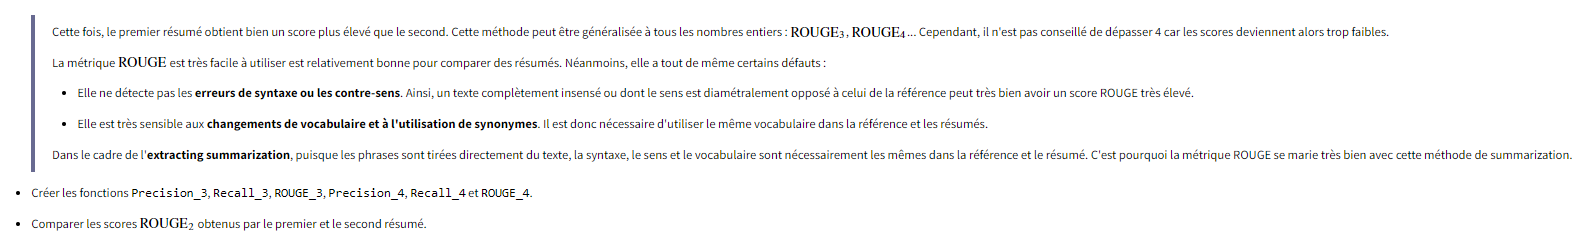

In [43]:
def Precision_3(ref, summary):
    """
    Calcule le score Rouge_1 de summary par rapport à ref.
    
    ref : Liste de mots.
    
    summary : liste de mots.
    """
    return Precision_1(n_gram(ref, 3), n_gram(summary, 3))

def Recall_3(ref, summary):
    return Recall_1(n_gram(ref, 3), n_gram(summary, 3))

def ROUGE_3(ref, summary):
    return ROUGE_1(n_gram(ref, 3), n_gram(summary, 3))

def Precision_4(ref, summary):
    return Precision_1(n_gram(ref, 4), n_gram(summary, 4))

def Recall_4(ref, summary):
    return Recall_1(n_gram(ref, 4), n_gram(summary, 4))

def ROUGE_4(ref, summary):
    return ROUGE_1(n_gram(ref, 4), n_gram(summary, 4))

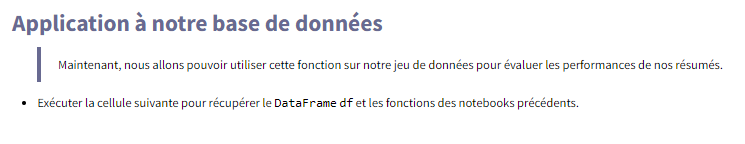

In [ ]:
import pandas as pd
from nltk import sent_tokenize, word_tokenize
import numpy as np


df = pd.read_json('Artikle.json')

for i in range(len(df)):
    keys = list(df['Artikle'][i].keys())
    for key in keys:
        df['Artikle'][i][int(key)] = df['Artikle'][i].pop(key)


def TF(token, artikle):
    """
    Calcule le score TF d'un mot dans un artikle
    
    token : Mot dont le score TF doit être calculé.
    
    artikle : Dictionnaire généré à partir d'un texte.
    """
    f = 0
    for key in artikle:
        for work in artikle[key]:
            if work == token:
                f += 1 
    return np.log(f+1)

def IDF(token, corpus):
    """
    Calcule le score IDF d'un mot dans un corpus d'artikles.
    
    token : Mot dont le score IDF doit être calculé.
    
    corpus : Liste d'artikles.
    """
    N = len(corpus)
    d=0
    present = False
    
    for artikle in corpus:
        for key in artikle:
            if token in artikle[key]:
                present = True
        d += int(present)
        present = False
                
    return np.log(N/(d+1) +1)

def TFIDF(token, artikle, corpus):
    """
    Calcule le score TF-IDF d'un mot dans un texte.
    
    token : mot dont le score doit être calculé.
    
    artikle : artikle qui servira à calculer le score du mot dans cet artikle.
    
    corpus : Liste d'artikles formant le corpus.
    """
    return TF(token, artikle)*IDF(token, corpus)

def score_sentence(corpus, artikle, sentence):
    """
    Calcule le score d'une phrase.
    
    corpus : Liste d'artikles.
    
    artikle : Dictionnaire de phrases.
    
    sentence : Phrase sous forme de liste de mots.
    """
    score_sentence = []
    for word in sentence :
        score_word = TFIDF(word, artikle, corpus)
        score_sentence.append(score_word)
    return np.mean(score_sentence)

def best_sentences(scores_artikle, nb_sentences):
    """
    Retourne les indices des phrases les plus importantes en fonction des scores obtenus.
    
    scores_artikle : Liste des scores de chaque phrase dans un texte.
    
    nb_sentences : Nombre de phrases à sélectionner.
    """
    
    return sorted(np.argsort(scores_artikle)[-nb_sentences:])

def summarize(i, n_sentences, df):
    """
    Synthèse extractive d'un article par la méthode TF-IDF.
    
    i : indice de l'article dans le corpus.
    
    n_sentences : nombre de phrases à conserver.
    
    df : DataFrame contenant les artikles dans une colonne 'Artikle'.    
    """
    corpus = df['Artikle']
    artikle = corpus[i]
    
    # Calcul du score de chaque phrase de l'artikle
    scores_artikle = [score_sentence(corpus, artikle, sentence) for sentence in artikle.values()]
    
    # Extraction des indices des phrases ayant les meilleurs scores
    result = best_sentences(scores_artikle, n_sentences)
    
    # Séparation de phrases l'article original 
    tokenized_article = sent_tokenize(df['Article'][i])
    
    # Extraction des phrases les plus importantes
    summary = [tokenized_article[i] for i in result]
    
    return summary

Lancer la cellule suivante pour récupérer le résumé du premier article de la base de données dans un string nommé summary

In [ ]:
summary = word_tokenize(" ".join(summarize(0, 8, df)))

print("The Reference\n",*reference, '\n\n Our Summary \n', *summary)

In [45]:
"""
The Reference
 Water spinach is a commonly eaten leaf vegetable of Asia 

 Our Summary 
 TimeWarner said fourth quarter sales rose 2 % to $ 11.1bn from $ 10.9bn . Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros , and less users for AOL . But its own internet business , AOL , had has mixed fortunes . TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission ( SEC ) , which is close to concluding . For the full-year , TimeWarner posted a profit of $ 3.36bn , up 27 % from its 2003 performance , while revenues grew 6.4 % to $ 42.09bn . For 2005 , TimeWarner is projecting operating earnings growth of around 5 % , and also expects higher revenue and wider profit margins . TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators . It will now book the sale of its stake in AOL Europe as a loss on the value of that stake .
 """

'\nThe Reference\n Water spinach is a commonly eaten leaf vegetable of Asia \n\n Our Summary \n TimeWarner said fourth quarter sales rose 2 % to $ 11.1bn from $ 10.9bn . Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros , and less users for AOL . But its own internet business , AOL , had has mixed fortunes . TimeWarner also has to restate 2000 and 2003 results following a probe by the US Securities Exchange Commission ( SEC ) , which is close to concluding . For the full-year , TimeWarner posted a profit of $ 3.36bn , up 27 % from its 2003 performance , while revenues grew 6.4 % to $ 42.09bn . For 2005 , TimeWarner is projecting operating earnings growth of around 5 % , and also expects higher revenue and wider profit margins . TimeWarner is to restate its accounts as part of efforts to resolve an inquiry into AOL by US market regulators . It will now book the sale of its stake in AOL Europe as a loss on the value of that stake .\n '

Evaluer la qualité de notre résumé en le comparant au résumé d'origine (on utilisera les métriques  ROUGE1 ,  ROUGE2 ,  ROUGE3  et  ROUGE4) .

In [ ]:
reference = word_tokenize(df['Summary'][0])

print("ROUGE_1", ROUGE_1(reference, summary))
print("ROUGE_2", ROUGE_2(reference, summary))
print("ROUGE_3", ROUGE_3(reference, summary))
print("ROUGE_4", ROUGE_4(reference, summary))

In [ ]:
"""
ROUGE_1 0.7700720535254759
ROUGE_2 0.5485853361728019
ROUGE_3 0.49707602339181284
ROUGE_4 0.47368421052631576
"""

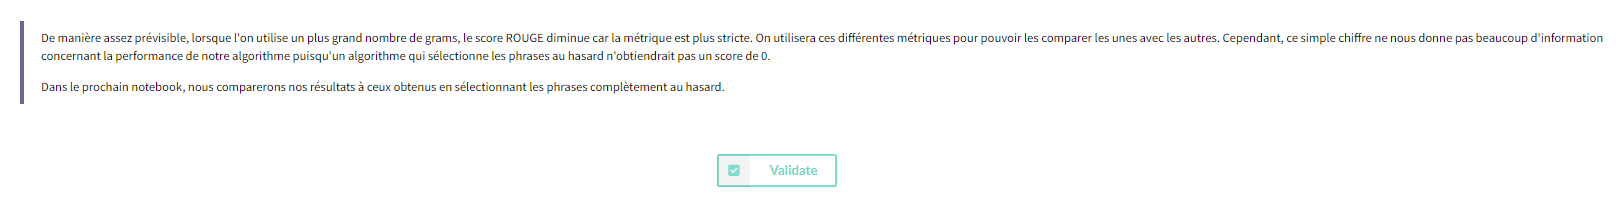

## D - Performances

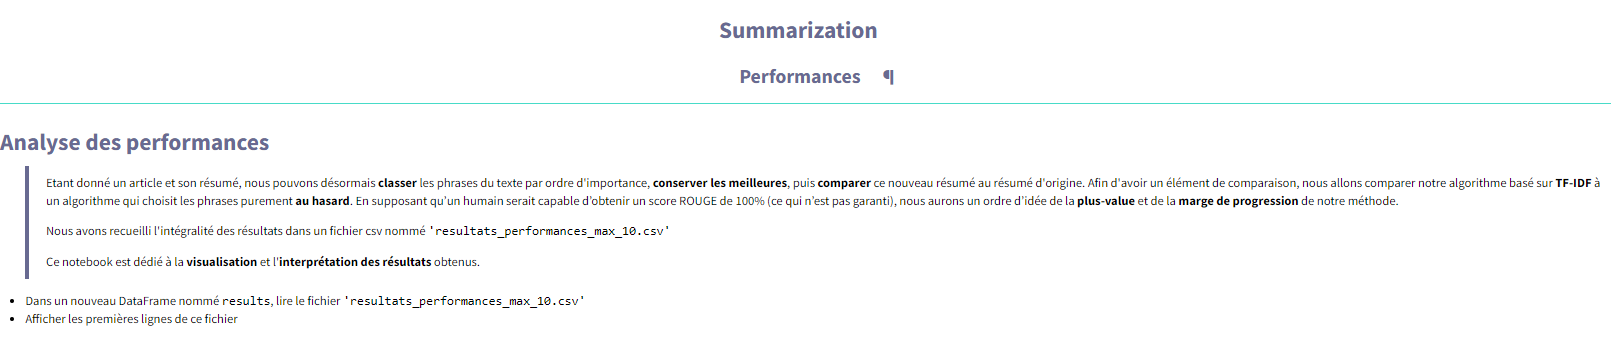

In [48]:
import pandas as pd

results = pd.read_csv('D:/data/csv/resultats_performances_max_10.csv',sep=';')

results

,Precision_1_Random,Recall_1_Random,Rouge_1_Random,Precision_2_Random,Recall_2_Random,Rouge_2_Random,Precision_3_Random,Recall_3_Random,Rouge_3_Random,Precision_4_Random,...,Rouge_1_TFIDF,Precision_2_TFIDF,Recall_2_TFIDF,Rouge_2_TFIDF,Precision_3_TFIDF,Recall_3_TFIDF,Rouge_3_TFIDF,Precision_4_TFIDF,Recall_4_TFIDF,Rouge_4_TFIDF
0,0.692047,0.158190,0.253289,0.473604,0.107906,0.173061,0.435250,0.097488,0.156814,0.423170,...,0.391013,0.799928,0.228175,0.350195,0.781027,0.218865,0.337053,0.770503,0.212116,0.327712
1,0.690517,0.235259,0.345968,0.482071,0.163064,0.240420,0.441267,0.147597,0.218177,0.425542,...,0.508898,0.772492,0.326864,0.454813,0.748806,0.313593,0.437531,0.733287,0.304109,0.425336
2,0.683951,0.303669,0.416363,0.482989,0.213431,0.293247,0.441785,0.193832,0.266876,0.424468,...,0.589786,0.746577,0.408063,0.524089,0.720610,0.391300,0.503614,0.702829,0.379343,0.489133
3,0.676839,0.376988,0.479516,0.484878,0.269226,0.342949,0.444108,0.245551,0.313231,0.425888,...,0.652659,0.719490,0.488074,0.577871,0.692470,0.467789,0.554725,0.673639,0.453447,0.538412
4,0.667640,0.439675,0.525382,0.483208,0.317392,0.379708,0.443346,0.290353,0.347718,0.424754,...,0.695320,0.698845,0.556244,0.615820,0.671600,0.533033,0.590815,0.652304,0.516594,0.573075
5,0.655233,0.512024,0.570811,0.481670,0.375985,0.419412,0.442867,0.345233,0.385306,0.423925,...,0.728326,0.671607,0.628472,0.646456,0.644760,0.602485,0.620117,0.625270,0.583775,0.601057
6,0.643190,0.570435,0.600323,0.479049,0.424779,0.447119,0.441477,0.391204,0.411882,0.422494,...,0.742850,0.649649,0.682995,0.662653,0.623460,0.654999,0.635684,0.604002,0.634497,0.615769
7,0.626270,0.621411,0.620404,0.473609,0.470443,0.469504,0.437390,0.434511,0.433621,0.418481,...,0.746239,0.624427,0.729047,0.670322,0.599218,0.699565,0.643225,0.579958,0.677417,0.622670
8,0.606021,0.672163,0.633585,0.469471,0.521909,0.491371,0.434970,0.483960,0.455414,0.416243,...,0.741791,0.602017,0.777786,0.675970,0.577903,0.747022,0.649017,0.558842,0.723135,0.627865
9,0.588274,0.717236,0.642723,0.467282,0.571153,0.511095,0.434575,0.531820,0.475548,0.415963,...,0.732722,0.581200,0.816917,0.676560,0.558015,0.785083,0.649807,0.539237,0.759769,0.628292


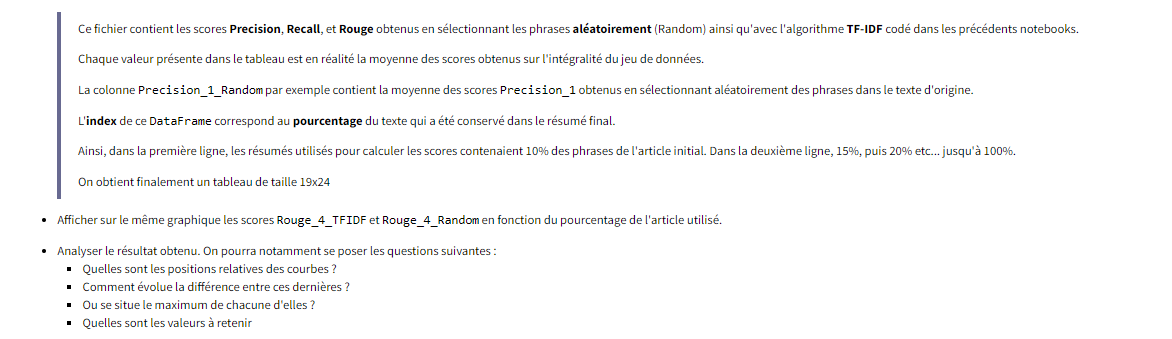

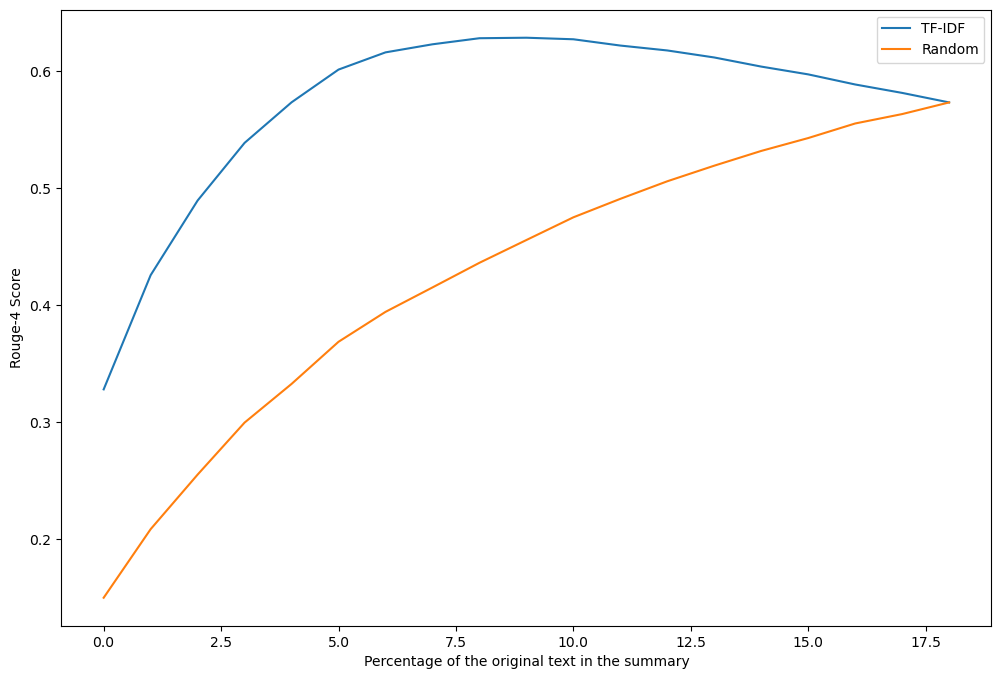

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
  
sns.lineplot(x=results.index, y=results['Rouge_4_TFIDF'], label='TF-IDF')

sns.lineplot(x=results.index, y=results['Rouge_4_Random'], label='Random')
plt.xlabel('Percentage of the original text in the summary')
plt.ylabel('Rouge-4 Score');

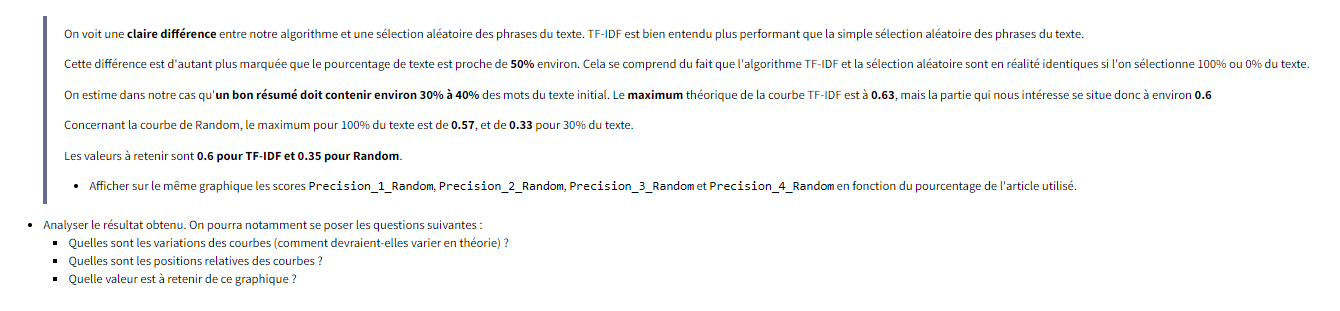

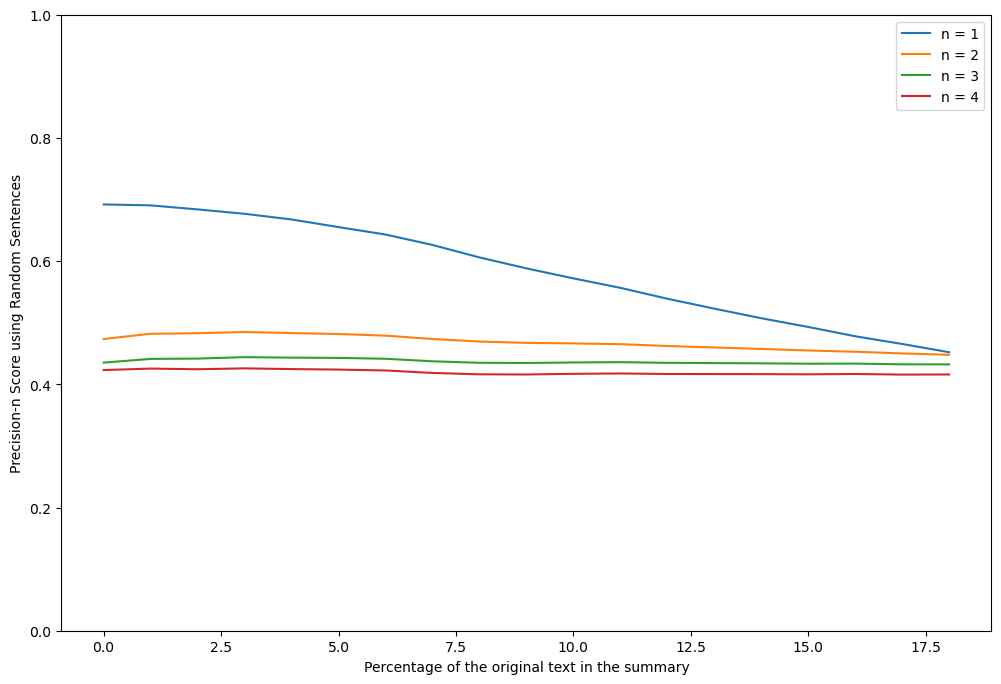

In [50]:
fig = plt.figure(figsize=(12, 8))
  
sns.lineplot(x=results.index, y=results['Precision_1_Random'], label='n = 1')
sns.lineplot(x=results.index, y=results['Precision_2_Random'], label='n = 2')
sns.lineplot(x=results.index, y=results['Precision_3_Random'], label='n = 3')
sns.lineplot(x=results.index, y=results['Precision_4_Random'], label='n = 4')
plt.ylim(0,1)
plt.xlabel('Percentage of the original text in the summary')
plt.ylabel('Precision-n Score using Random Sentences');

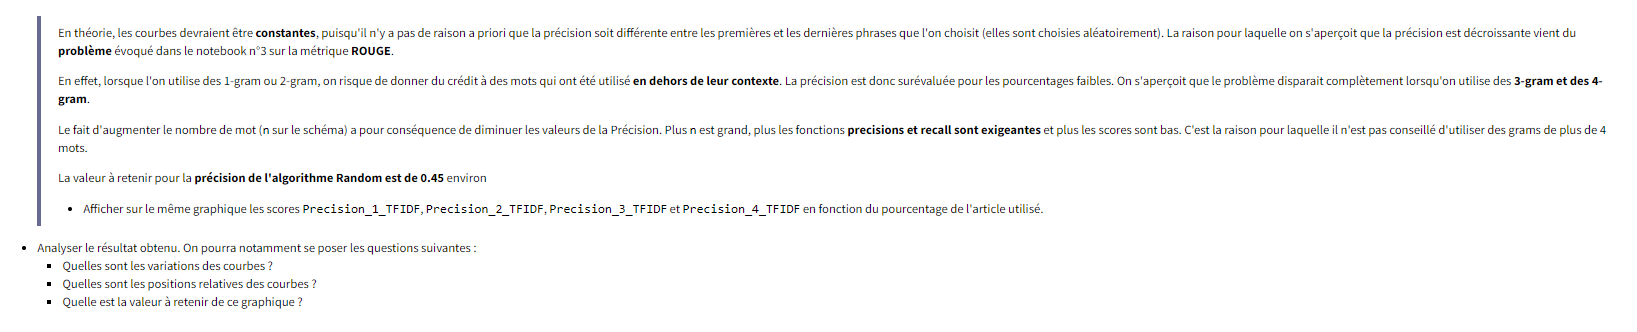

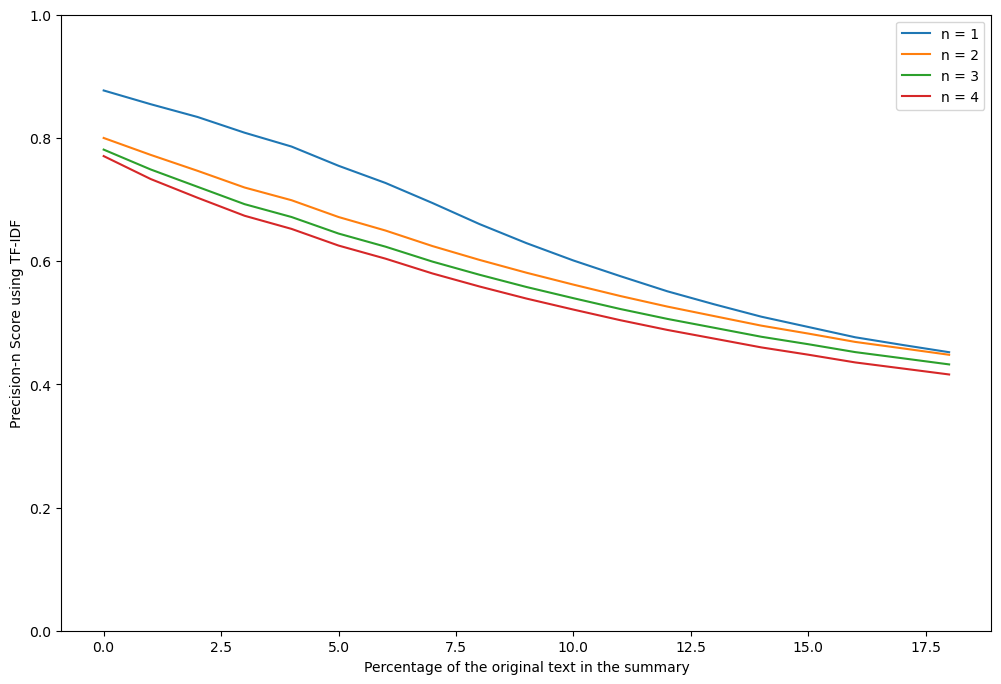

In [51]:
fig = plt.figure(figsize=(12, 8))
  
sns.lineplot(x=results.index, y=results['Precision_1_TFIDF'], label='n = 1')
sns.lineplot(x=results.index, y=results['Precision_2_TFIDF'], label='n = 2')
sns.lineplot(x=results.index, y=results['Precision_3_TFIDF'], label='n = 3')
sns.lineplot(x=results.index, y=results['Precision_4_TFIDF'], label='n = 4')
plt.ylim(0,1)
plt.xlabel('Percentage of the original text in the summary')
plt.ylabel('Precision-n Score using TF-IDF');

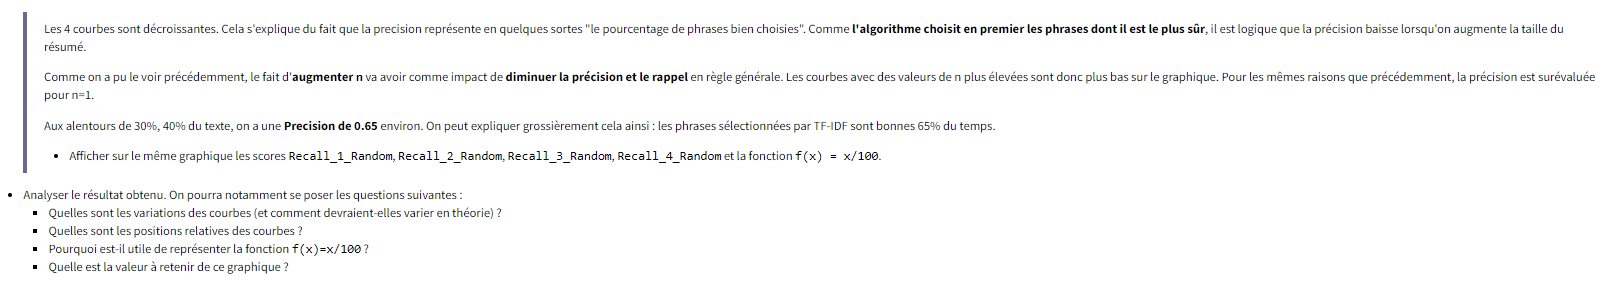

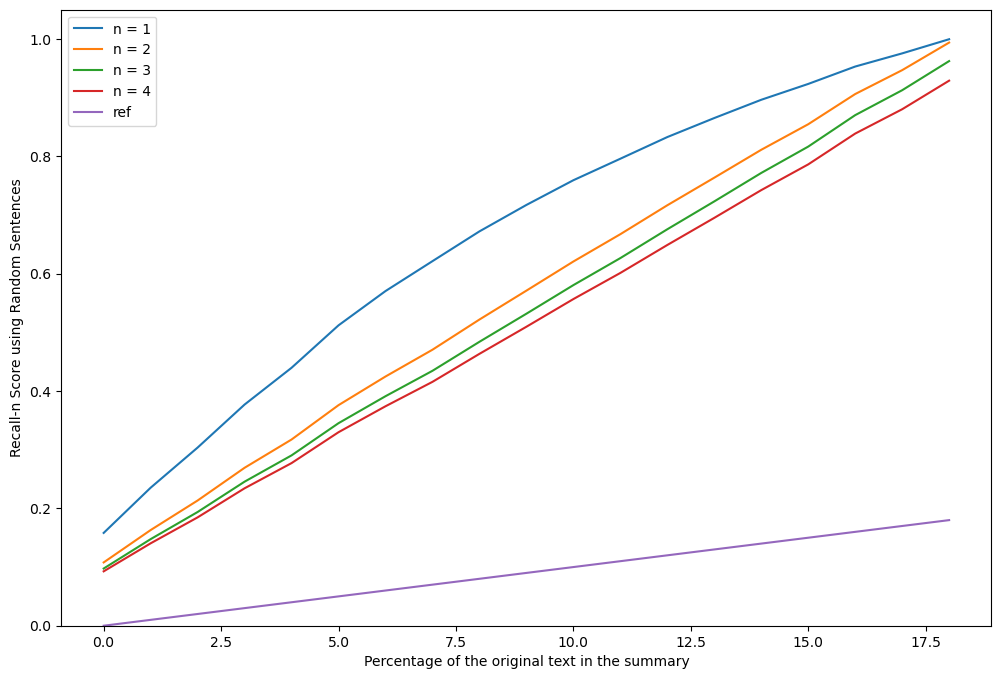

In [52]:
fig = plt.figure(figsize=(12, 8))
  
sns.lineplot(x=results.index, y=results['Recall_1_Random'], label='n = 1')
sns.lineplot(x=results.index, y=results['Recall_2_Random'], label='n = 2')
sns.lineplot(x=results.index, y=results['Recall_3_Random'], label='n = 3')
sns.lineplot(x=results.index, y=results['Recall_4_Random'], label='n = 4')
plt.ylim(0,1.05)
sns.lineplot(x=results.index, y=results.index/100, label='ref')
plt.xlabel('Percentage of the original text in the summary')
plt.ylabel('Recall-n Score using Random Sentences');

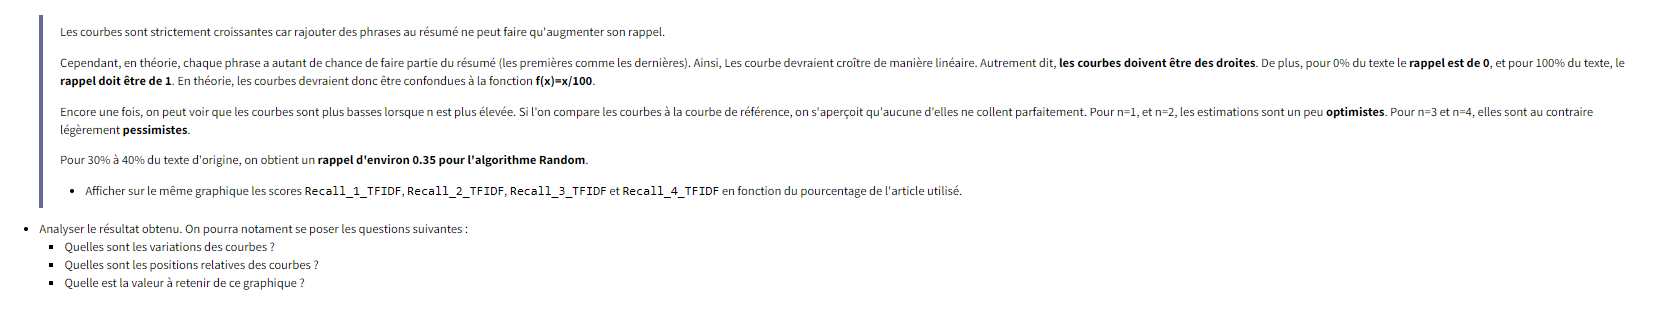

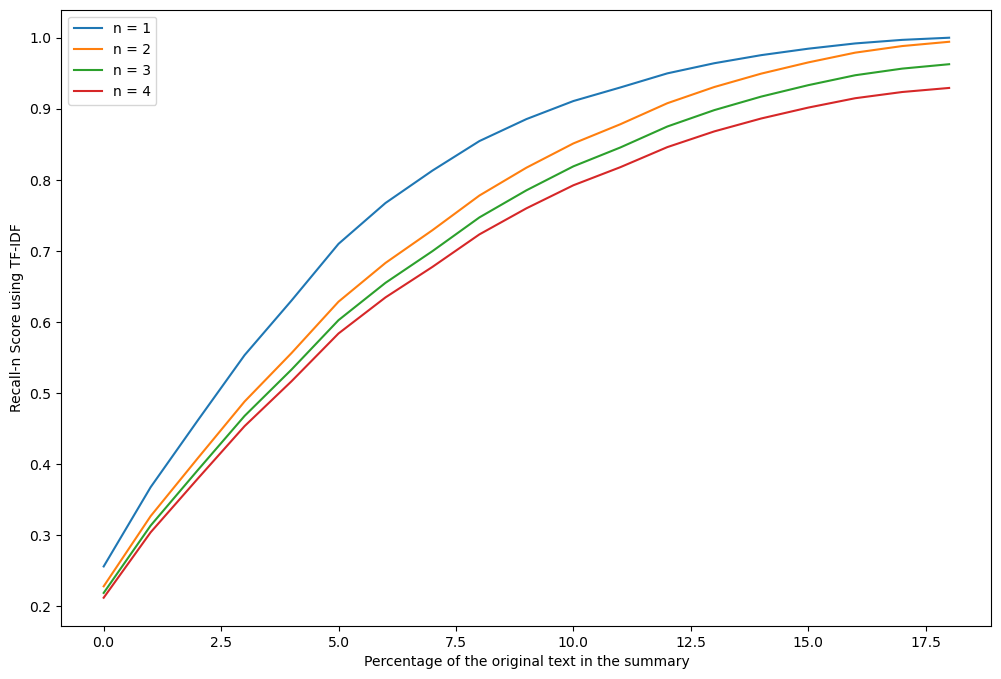

In [53]:
fig = plt.figure(figsize=(12, 8))
  
sns.lineplot(x=results.index, y=results['Recall_1_TFIDF'], label='n = 1')
sns.lineplot(x=results.index, y=results['Recall_2_TFIDF'], label='n = 2')
sns.lineplot(x=results.index, y=results['Recall_3_TFIDF'], label='n = 3')
sns.lineplot(x=results.index, y=results['Recall_4_TFIDF'], label='n = 4')
plt.xlabel('Percentage of the original text in the summary')
plt.ylabel('Recall-n Score using TF-IDF');

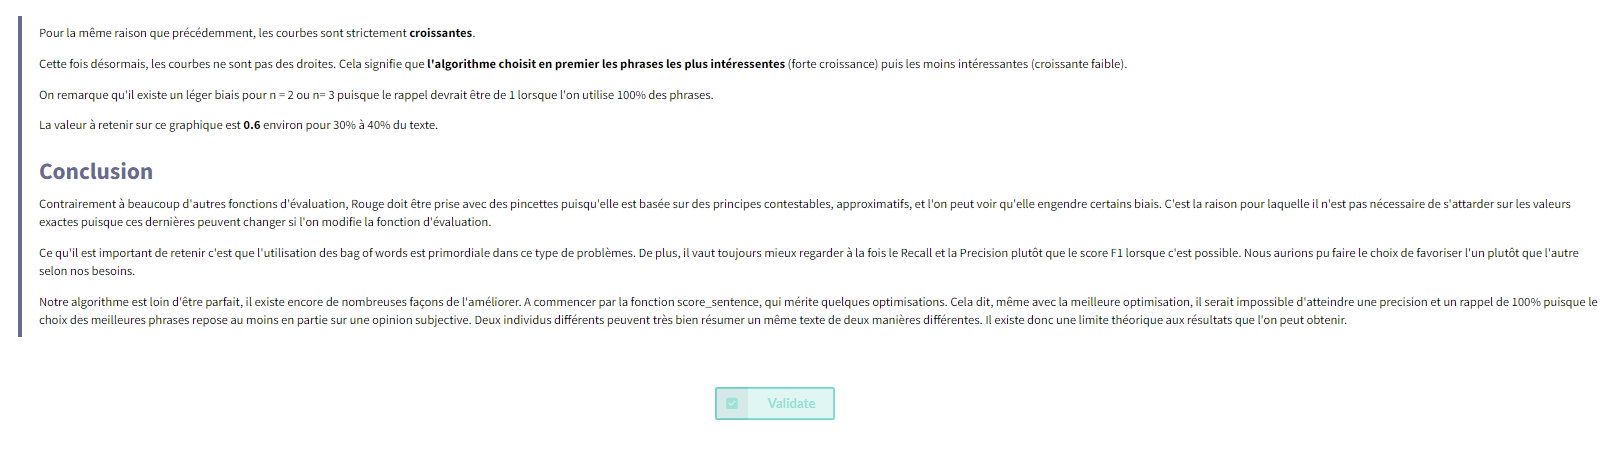